In [82]:
import pandas as pd
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from Validation.Validation import ExceptOneValidation
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [83]:
data=pd.read_csv("data/data_filtrage_5.csv")

In [84]:
df=data.copy()

In [85]:
X=df.drop(['index','nb_seance','nb_passage','x_force','z_force','y_force'],axis=1)
y=df['z_force']

In [86]:
lgbmr=LGBMRegressor(boosting_type='goss',random_state=42,n_estimators=300,learning_rate=0.2,n_jobs=-1)
score_lgbmr,error_lgbmr,predict_lgbmr=ExceptOneValidation(lgbmr,X,y)

In [87]:
pd.Series(score_lgbmr).describe()

count    100.000000
mean       0.978315
std        0.032850
min        0.743620
25%        0.979295
50%        0.988430
75%        0.991912
max        0.998700
dtype: float64

In [14]:
pd.Series(error_lgbmr).describe()

count      100.000000
mean      5719.390533
std       8797.953833
min        358.686335
25%       2105.573261
50%       3132.608659
75%       5364.686767
max      71866.208190
dtype: float64

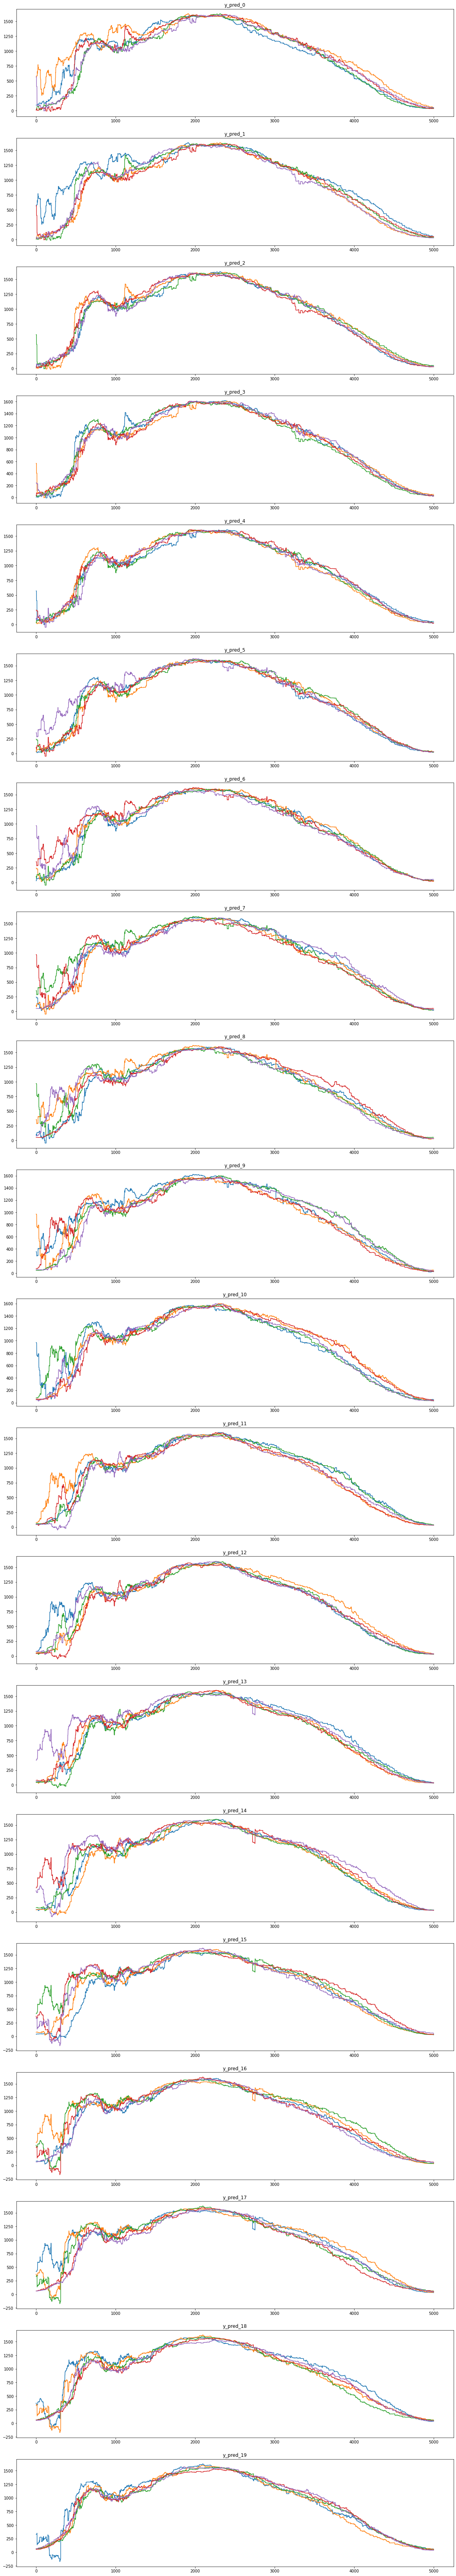

In [15]:
df['y_pred']=predict_lgbmr
fig,axes = plt.subplots(20,1,figsize=(20,120))
for i in range(20):
    df['y_pred'].iloc[i*5000:i*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')
    df['y_pred'].iloc[(i+1)*5000:(i+1)*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')
    df['y_pred'].iloc[(i+2)*5000:(i+2)*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')
    df['y_pred'].iloc[(i+3)*5000:(i+3)*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')
    df['y_pred'].iloc[(i+4)*5000:(i+4)*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')

In [68]:
df['y_pred_smooth']=df['y_pred']
wind=301
windna=int((wind-1)/2)
for i in range(100):
    df['y_pred_smooth'].iloc[i*5000+windna:i*5000+5000-windna]=df['y_pred'].iloc[i*5000:i*5000+5000].rolling(wind,center=True).mean().iloc[windna:-windna]

/tmp/ipykernel_5321/1616595492.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_pred_smooth'].iloc[i*5000+windna:i*5000+5000-windna]=df['y_pred'].iloc[i*5000:i*5000+5000].rolling(wind,center=True).mean().iloc[windna:-windna]


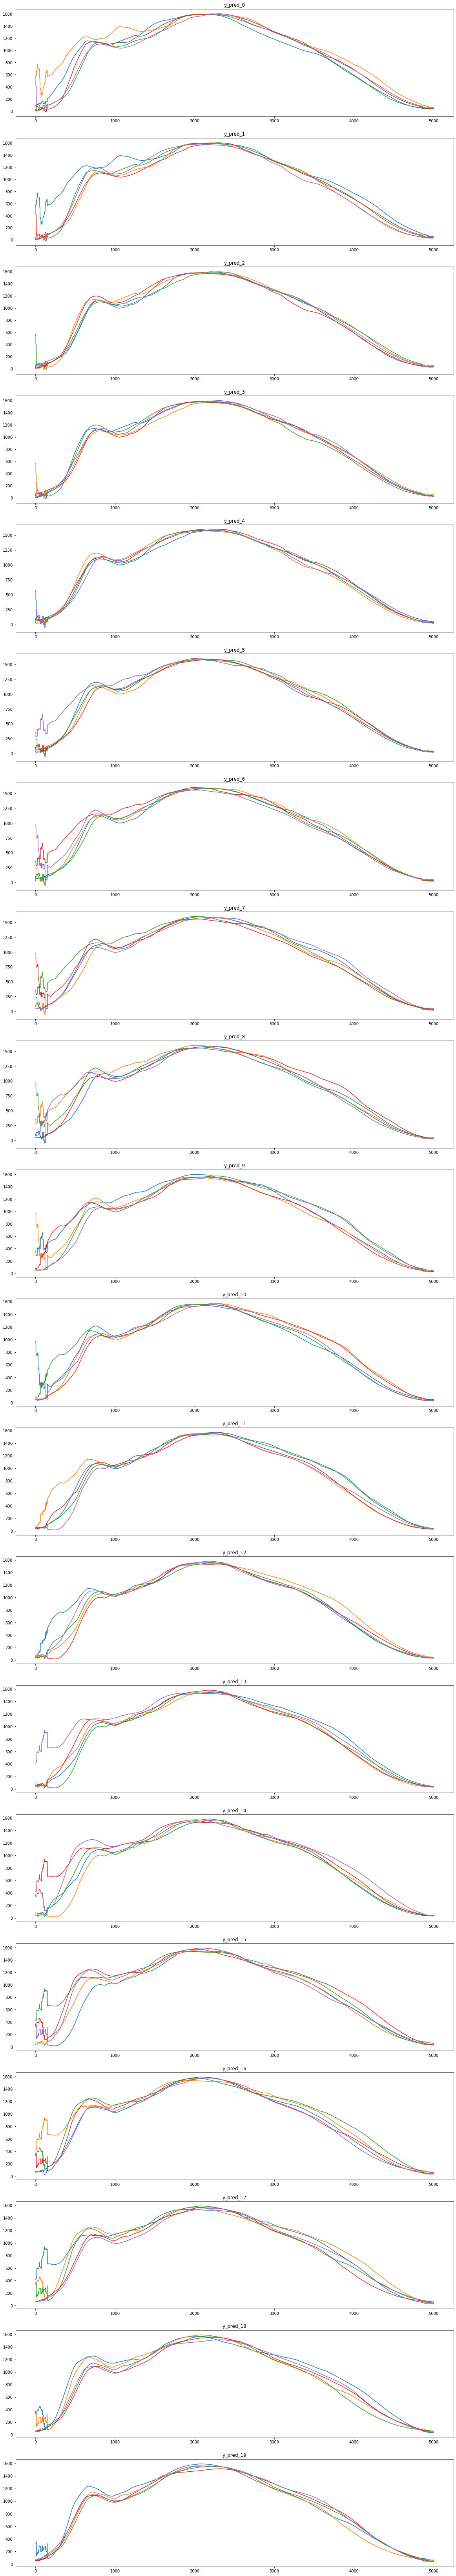

In [69]:
fig,axes = plt.subplots(20,1,figsize=(20,120))
for i in range(20):
    df['y_pred_smooth'].iloc[i*5000:i*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')
    df['y_pred_smooth'].iloc[(i+1)*5000:(i+1)*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')
    df['y_pred_smooth'].iloc[(i+2)*5000:(i+2)*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')
    df['y_pred_smooth'].iloc[(i+3)*5000:(i+3)*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')
    df['y_pred_smooth'].iloc[(i+4)*5000:(i+4)*5000+5000].reset_index(drop=True).plot(ax=axes[i],title=f'y_pred_{i}')

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
mean_squared_error(df['z_force'],df['y_pred'])**(1/2)

75.62665226721155

In [72]:
mean_squared_error(df['z_force'],df['y_pred_smooth'])**(1/2)

67.90244646762913